## About The Dataset

 - The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

### Phase 1 EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
data_path = os.path.join('..', 'data', 'raw', 'framingham.csv')
data = pd.read_csv(data_path)


In [18]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
data.loc[data['diabetes'] == 1].head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
56,0,54,1.0,1,9.0,0.0,0,0,1,266.0,114.0,76.0,17.61,88.0,55.0,0
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0


# Columns Explanation

- **male**  
  - 1 = Male  
  - 0 = Female  

- **age**  
  - Age (in years)  

- **education**  
  - Education level (coded):  
    - 1 = Some high school  
    - 2 = High school graduate  
    - 3 = Some college  
    - 4 = College/University graduate  

- **currentSmoker**  
  - 1 = Current smoker  
  - 0 = Non-smoker  

- **cigsPerDay**  
  - Number of cigarettes per day (if currentSmoker = 1)  

- **BPMeds**  
  - Taking blood pressure medication:  
    - 1 = Yes  
    - 0 = No  

- **prevalentStroke**  
  - History of stroke:  
    - 1 = Yes  
    - 0 = No  

- **prevalentHyp**  
  - Hypertension (chronic high blood pressure):  
    - 1 = Yes  
    - 0 = No  

- **diabetes**  
  - 1 = Has diabetes  
  - 0 = Does not have diabetes  

- **totChol** (Total cholesterol, mg/dL)  
  - Normal: < 200  
  - Borderline high: 200–239  
  - High: ≥ 240  

- **sysBP** (Systolic blood pressure)  
  - Normal: < 120  
  - Elevated: 120–129  
  - Hypertension Stage 1: 130–139  
  - Hypertension Stage 2: ≥ 140  

- **diaBP** (Diastolic blood pressure)  
  - Normal: < 80  
  - Elevated: 80–89  
  - Hypertension Stage 2: ≥ 90  

- **BMI** (Body Mass Index)  
  - Underweight: < 18.5  
  - Normal: 18.5–24.9  
  - Overweight: 25–29.9  
  - Obese: ≥ 30  

- **heartRate** (Beats per minute)  
  - Normal resting range: 60–100  

- **glucose** (Blood glucose, mg/dL, fasting)  
  - Normal: < 100  
  - Prediabetes: 100–125  
  - Diabetes: ≥ 126  

- **TenYearCHD** (10-year risk of coronary heart disease)  
  - 1 = Risk present (likely CHD within 10 years)  
  - 0 = No risk predicted  


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [27]:
data.shape

(4240, 16)

In [28]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Overall Interpretation

- The population is **middle-aged (32–70)**, almost half male.  
- About **50% smoke**, with a subgroup smoking heavily (**20+ cigs/day**).  
- Around **31% hypertensive** and **3% diabetic**.  
- **Cholesterol and blood pressure are generally high**, indicating cardiovascular risk factors.  
- **Average BMI ≈ 26** → slightly overweight overall.  
- About **15%** actually had **CHD events within 10 years**, aligning with the dataset’s goal (predicting CHD risk).


#### Remove the duplicates

In [36]:
duplicate = data.duplicated()
data = data[~duplicate]

In [ ]:
missing_values = data.isnull().sum()

print(missing_values)


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [43]:
log_reg_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]
)

rand_for_pipeline = Pipeline(steps=[
   ("imputer", SimpleImputer(strategy="median", add_indicator=True)),
   ("scaler", StandardScaler()),
   ("classifier", RandomForestClassifier(random_state=42))
])

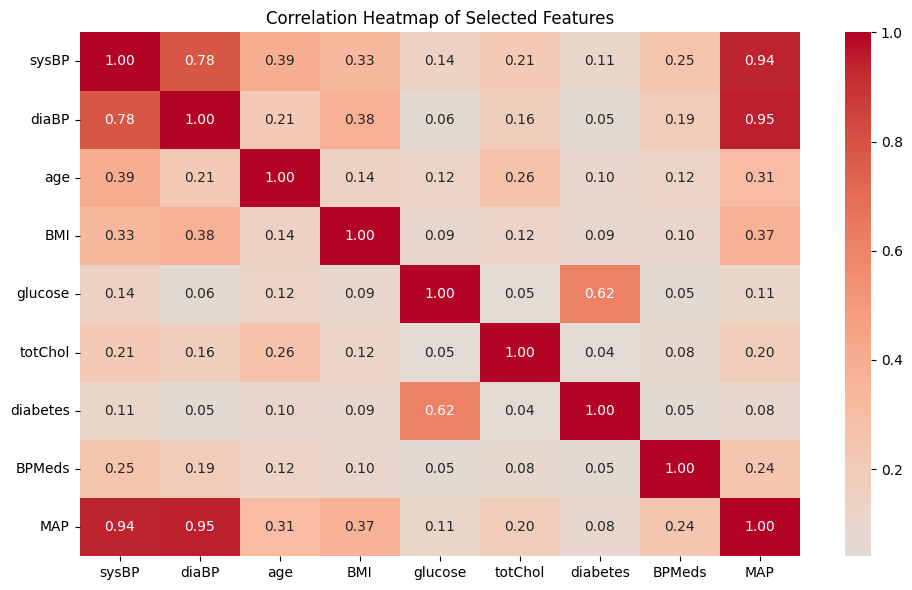

In [65]:
selected_columns = ['sysBP', 'diaBP', 'age', 'BMI', 'glucose','totChol','diabetes', 'BPMeds', 'MAP']
corr_subset = data[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

In [ ]:
data['MAP'] = (2 * data['diaBP'] + data['sysBP']) / 3

In [72]:
log_reg_features = data.copy()

log_reg_features.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP'],
      dtype='object')

In [67]:
rand_for_features = data.copy()

In [ ]:
data['Age_Group'] = pd.cut(
    data['age'],
    bins=[29, 39, 49, 59, 70],
    labels=['Young Adult (30–39)', 'Middle Age I (40–49)', 'Middle Age II (50–59)', 'Senior (60–70)']
)

log_reg_features['Age_Group'] = data['Age_Group']


In [84]:
data['HeavySmoker'] = (data['cigsPerDay'] > 20).astype(int)
data['PackYears'] = (data['cigsPerDay'] / 20) * (data['age'] - 18)
data['glucose_missing'] = data['glucose'].isnull().astype(int)

In [87]:
data['glucose_missing'].value_counts()

glucose_missing
0    3852
1     388
Name: count, dtype: int64

(array([  6.,  60., 176., 314., 366., 339., 328., 323., 305., 140., 295.,
        271., 268., 240., 230., 209., 203.,  95.,  63.,   9.]),
 array([32. , 33.9, 35.8, 37.7, 39.6, 41.5, 43.4, 45.3, 47.2, 49.1, 51. ,
        52.9, 54.8, 56.7, 58.6, 60.5, 62.4, 64.3, 66.2, 68.1, 70. ]),
 <BarContainer object of 20 artists>)

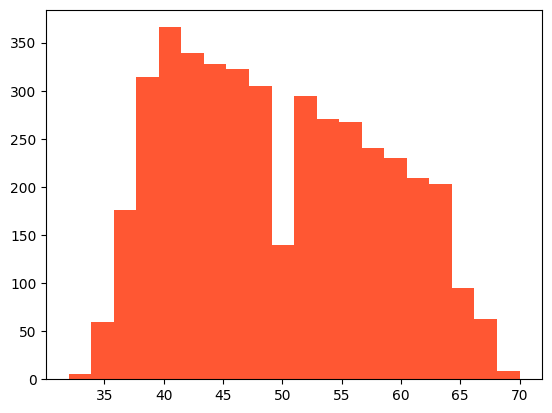

In [95]:
plt.hist(data['age'], bins=20, color='#FF5733')

(array([2.413e+03, 2.740e+02, 3.730e+02, 3.610e+02, 2.840e+02, 2.220e+02,
        1.070e+02, 6.500e+01, 5.000e+01, 1.900e+01, 1.400e+01, 1.400e+01,
        6.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,   7.35,  14.7 ,  22.05,  29.4 ,  36.75,  44.1 ,  51.45,
         58.8 ,  66.15,  73.5 ,  80.85,  88.2 ,  95.55, 102.9 , 110.25,
        117.6 , 124.95, 132.3 , 139.65, 147.  ]),
 <BarContainer object of 20 artists>)

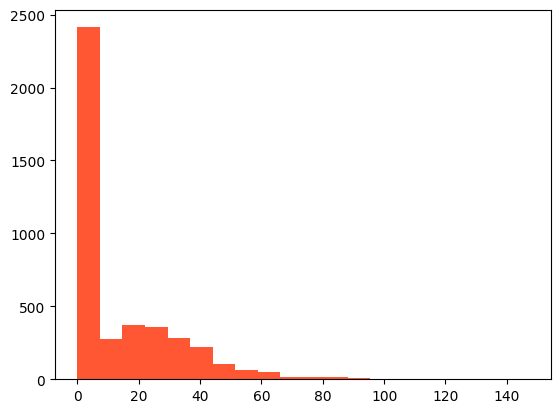

In [97]:
plt.hist(data['PackYears'], bins=20, color='#FF5733')

(array([ 22., 136., 432., 779., 946., 805., 561., 263., 130.,  66.,  25.,
         33.,  10.,   7.,   4.,   0.,   0.,   1.,   0.,   1.]),
 array([15.54 , 17.603, 19.666, 21.729, 23.792, 25.855, 27.918, 29.981,
        32.044, 34.107, 36.17 , 38.233, 40.296, 42.359, 44.422, 46.485,
        48.548, 50.611, 52.674, 54.737, 56.8  ]),
 <BarContainer object of 20 artists>)

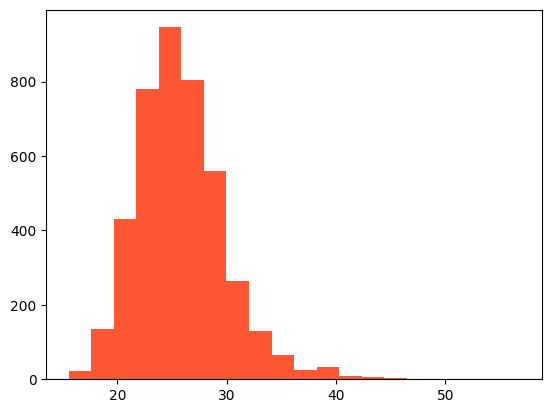

In [99]:
plt.hist(data['BMI'], bins=20, color='#FF5733')

In [101]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'MAP',
       'Age_Group', 'HeavySmoker', 'PackYears', 'glucose_missing'],
      dtype='object')

(array([ 10.,  51., 140., 398., 580., 681., 790., 567., 400., 246., 172.,
        114.,  31.,  39.,   5.,   9.,   3.,   1.,   0.,   2.]),
 array([ 44.  ,  48.95,  53.9 ,  58.85,  63.8 ,  68.75,  73.7 ,  78.65,
         83.6 ,  88.55,  93.5 ,  98.45, 103.4 , 108.35, 113.3 , 118.25,
        123.2 , 128.15, 133.1 , 138.05, 143.  ]),
 <BarContainer object of 20 artists>)

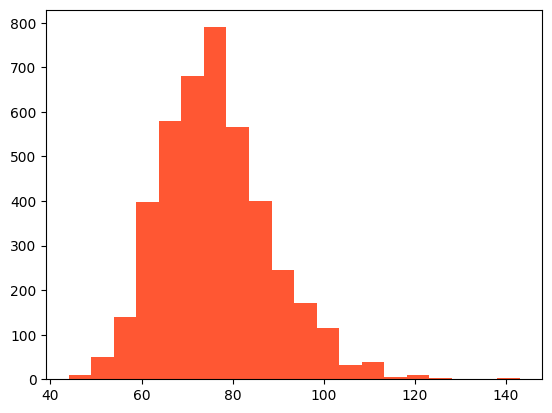

In [103]:
plt.hist(data['heartRate'], bins=20, color='#FF5733')

(array([  7.,  66., 240., 549., 769., 850., 648., 439., 265., 178.,  99.,
         66.,  25.,  23.,   5.,   6.,   3.,   0.,   1.,   1.]),
 array([ 62.5       ,  68.79166667,  75.08333333,  81.375     ,
         87.66666667,  93.95833333, 100.25      , 106.54166667,
        112.83333333, 119.125     , 125.41666667, 131.70833333,
        138.        , 144.29166667, 150.58333333, 156.875     ,
        163.16666667, 169.45833333, 175.75      , 182.04166667,
        188.33333333]),
 <BarContainer object of 20 artists>)

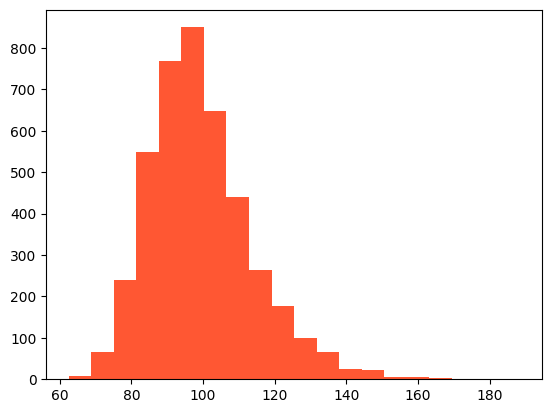

In [105]:
plt.hist(data['MAP'], bins=20, color='#FF5733')

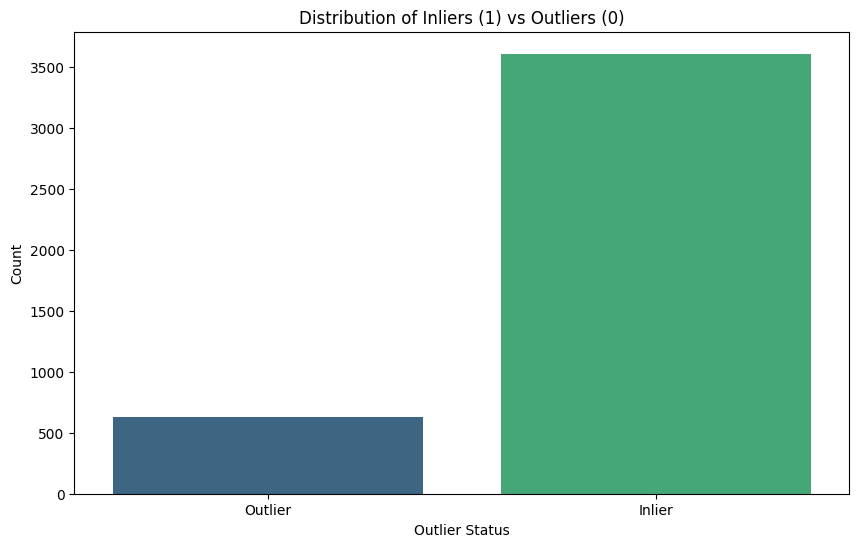

Percentage of observations detected as outliers: 14.83%


In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', "BMI", 'MAP', 'heartRate', 'PackYears']
X = data[features].dropna()

clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
outliers = clf.fit_predict(X)

data['outlier_IF'] = 0
data.loc[X.index, 'outlier_IF'] = (outliers == 1).astype(int)

plt.figure(figsize=(10, 6))
sns.countplot(x='outlier_IF', data=data, palette='viridis')
plt.title('Distribution of Inliers (1) vs Outliers (0)')
plt.xlabel('Outlier Status')
plt.xticks([0, 1], ['Outlier', 'Inlier'])
plt.ylabel('Count')
plt.show()

pct_outliers = (data['outlier_IF'] == 0).mean() * 100
print(f"Percentage of observations detected as outliers: {pct_outliers:.2f}%")

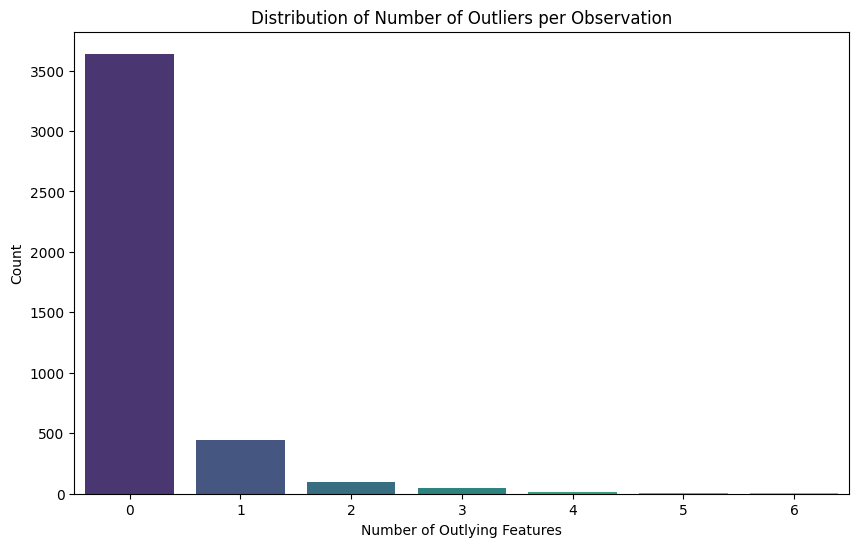

Percentage of observations with at least one outlier: 14.17%


In [116]:
outlier_flags = pd.DataFrame(index=data.index)


for col in features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_flags[col] = (data[col] < lower_bound) | (data[col] > upper_bound)

data['outlier_count'] = outlier_flags.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='outlier_count', data=data, palette='viridis')
plt.title('Distribution of Number of Outliers per Observation')
plt.xlabel('Number of Outlying Features')
plt.ylabel('Count')
plt.show()

pct_outliers = (data['outlier_count'] > 0).mean() * 100
print(f"Percentage of observations with at least one outlier: {pct_outliers:.2f}%")